In [78]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm

In [79]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [80]:
# import data
train = pd.read_csv(r'D:\workstation\GitHub\DeepMindStudy\data\house prices\train.csv')
test = pd.read_csv(r'D:\workstation\GitHub\DeepMindStudy\data\house prices\test.csv')

## Inspect for outliers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


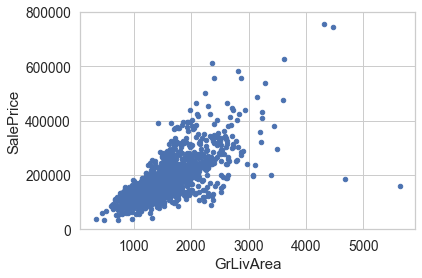

In [81]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [82]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


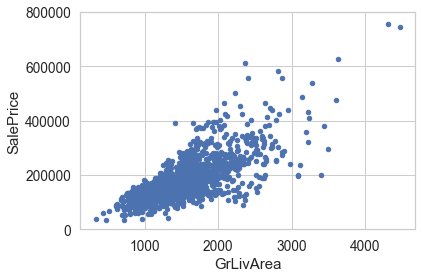

In [83]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [84]:
y_train = train.SalePrice
train.drop("SalePrice",axis=1,inplace=True)
full = pd.concat([train,test],ignore_index=True)
print("The size of train data is : {} ".format(train.shape))
print("The size of test data is : {} ".format(test.shape))
print("The size of full data is : {} ".format(full.shape))
print("The size of train data target varible is : {} ".format(y_train.shape))

The size of train data is : (1458, 80) 
The size of test data is : (1459, 80) 
The size of full data is : (2917, 80) 
The size of train data target varible is : (1458,) 


In [85]:
full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Data preprocessing

## Missing variables

In [86]:
full_na = (full.isnull().sum()/ len(full)) * 100
full_na = full_na.drop(full_na[full_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':full_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

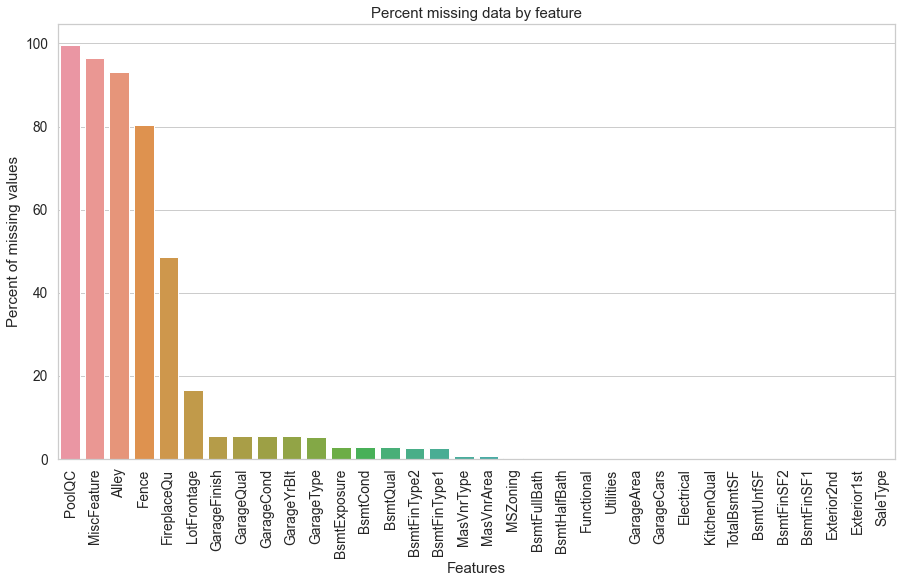

In [87]:
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=full_na.index, y=full_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [88]:
# For those NaN indicating not eligible  
# Categorical features
for col in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 
            'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    full[col] = full[col].fillna('None')
# Numerical features
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    full[col] = full[col].fillna(0)

In [ ]:
# No good way to estimate LotFrontage, 

In [ ]:
# for MSZoning, fill it by the mode in its neighborhood, **manually**
# full['MSZoning'] = full.groupby('Neighborhood')['MSZoning'].transform(lambda x:x.fillna(x.mode()))

In [89]:
full[full.MSZoning.isnull()].Neighborhood

1913     IDOTRR
2214     IDOTRR
2248     IDOTRR
2902    Mitchel
Name: Neighborhood, dtype: object

In [90]:
full[full.Neighborhood=='IDOTRR'].MSZoning.mode()

0    RM
Name: MSZoning, dtype: object

In [91]:
full[full.Neighborhood=='Mitchel'].MSZoning.mode()

0    RL
Name: MSZoning, dtype: object

In [92]:
full[full.Id == 2905]['MSZoning'] = 'RL'
full['MSZoning'] = full['MSZoning'].fillna('RM')

In [93]:
# fill by most common str
full['Exterior1st'] = full['Exterior1st'].fillna(full['Exterior1st'].mode()[0])
full['Exterior2nd'] = full['Exterior2nd'].fillna(full['Exterior2nd'].mode()[0])
full['Electrical'] = full['Electrical'].fillna(full['Electrical'].mode()[0])
full['KitchenQual'] = full['KitchenQual'].fillna(full['KitchenQual'].mode()[0])
full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0])

In [94]:
# for Utilities, nearly all records are 'ALLpub', thus we can safely drop it
full.drop('Utilities',axis=1,inplace=True)

In [95]:
# for Funtional, according to data description, NaN means 'Typ'
full["Functional"] = full["Functional"].fillna("Typ")

In [96]:
full.isnull().sum()[full.isnull().sum()!=0]

LotFrontage    486
dtype: int64

# Exploratory Visualization

Two Questions I care the most:
* Can overall condition/quality represent the condition/quality of each component?
* Which features are more important?

## Can overall condition/quality represent the condition/quality of each component?

In [97]:
QuaCon = full[['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual',
             'FireplaceQu','GarageQual','GarageCond']]

In [98]:
QuaCon.drop(QuaCon[QuaCon.FireplaceQu == 'None'].index, inplace=True)
QuaCon.drop(QuaCon[QuaCon.GarageQual == 'None'].index, inplace=True)
QuaCon.drop(QuaCon[QuaCon.GarageCond == 'None'].index, inplace=True)
QuaCon.drop(QuaCon[QuaCon.BsmtQual == 'None'].index, inplace=True)
QuaCon.drop(QuaCon[QuaCon.BsmtCond == 'None'].index, inplace=True)

In [99]:
nn = {'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}
for col in ('ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
            'GarageCond'):
    QuaCon[col] = QuaCon[col].map(nn)
    QuaCon[col] = QuaCon[col].astype(float)

In [100]:
Qua = QuaCon.drop('OverallCond',axis=1)
Qua['OverallQual'] = Qua['OverallQual'].astype(float)
Con = QuaCon.drop('OverallQual',axis=1)
Con['OverallCond'] = Con['OverallCond'].astype(float)

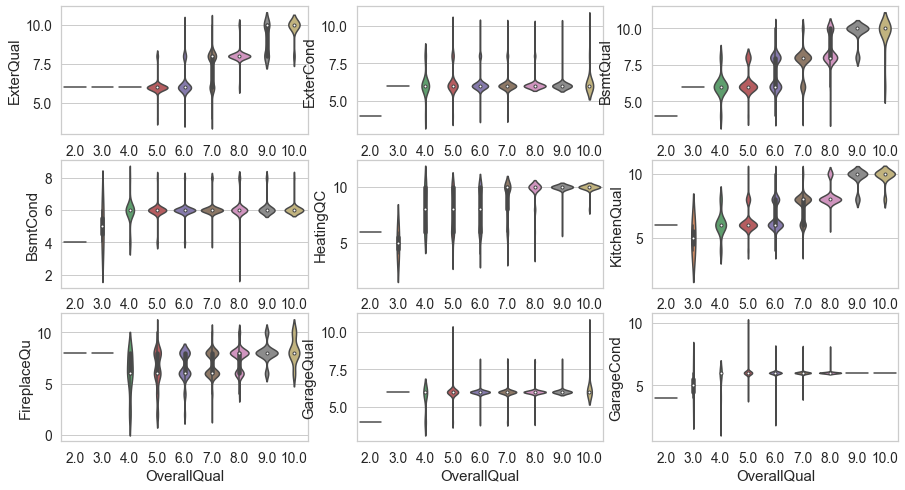

In [101]:
fig, axes = plt.subplots(figsize=(15, 8),nrows=3, ncols=3)
col = ('ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond')
for i in range(3):
    for j in range(3):
        sns.violinplot(x='OverallQual', y=col[3*i+j], data=Qua,figsize=(15,8),alpha=0.3,ax=axes[i,j])
        

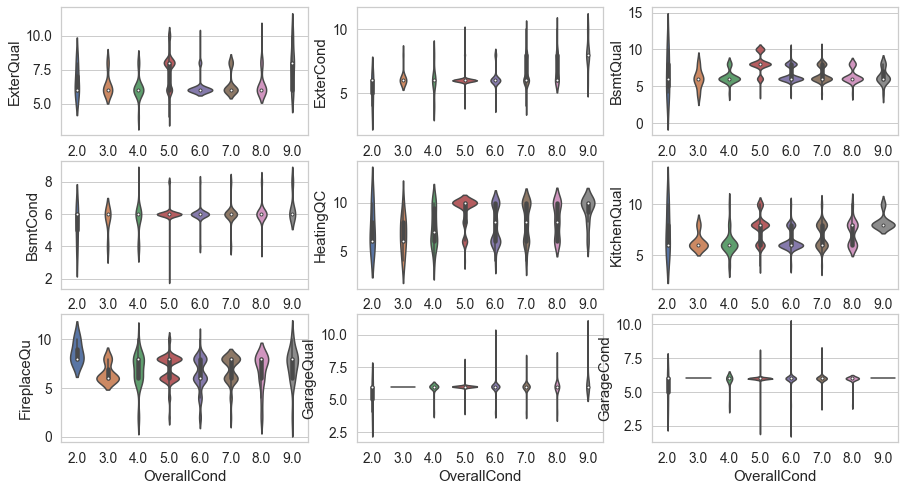

In [102]:
fig, axes = plt.subplots(figsize=(15, 8),nrows=3, ncols=3)
col = ('ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond')
for i in range(3):
    for j in range(3):
        sns.violinplot(x='OverallCond', y=col[3*i+j], data=Con,figsize=(15,8),alpha=0.3,ax=axes[i,j])

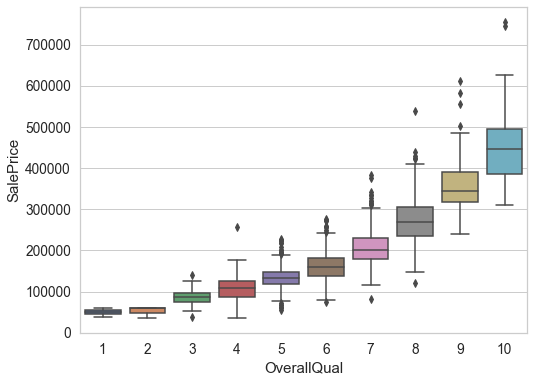

In [103]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([y_train, train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

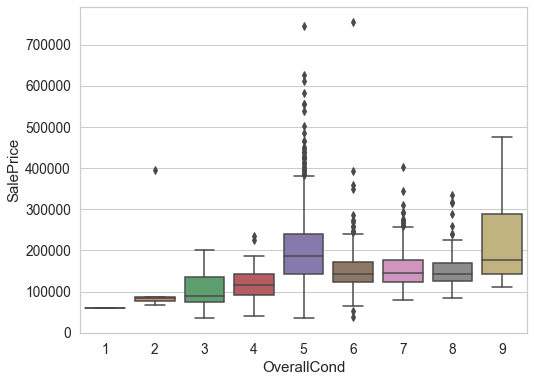

In [104]:
#box plot overallqual/saleprice
var = 'OverallCond'
data = pd.concat([y_train, train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

## Overall correlation

In [105]:
train_corr = pd.concat([y_train, train],axis=1)

In [106]:
nn = {'Ex':10,'Gd':8,'TA':6,'Fa':4,'Po':2}
for col in ('ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
            'GarageCond'):
    train_corr[col] = train_corr[col].map(nn)
    train_corr[col] = train_corr[col].astype(float)

In [107]:
# can't explain reason in heatmap plotting 
train_corr.drop('BsmtQual',axis=1,inplace=True)
train_corr.drop('GarageYrBlt',axis=1,inplace=True)
train_corr.drop('MasVnrArea',axis=1,inplace=True)

<AxesSubplot:>

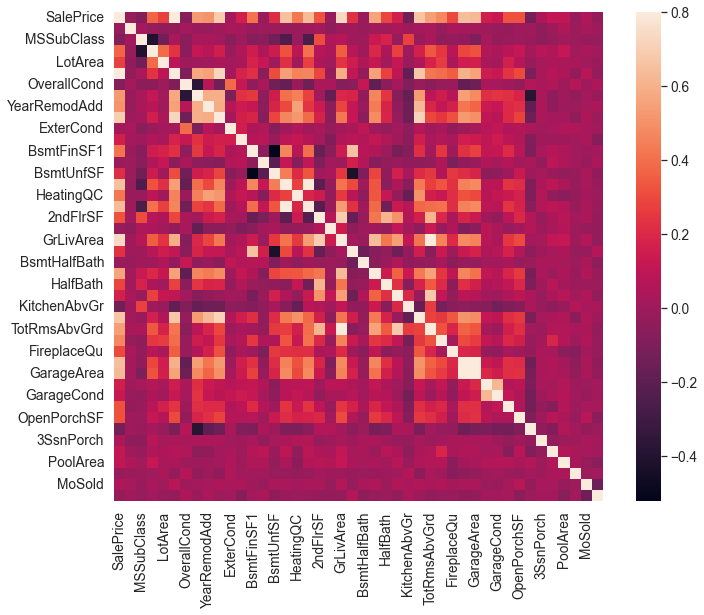

In [108]:
corrmat = train_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

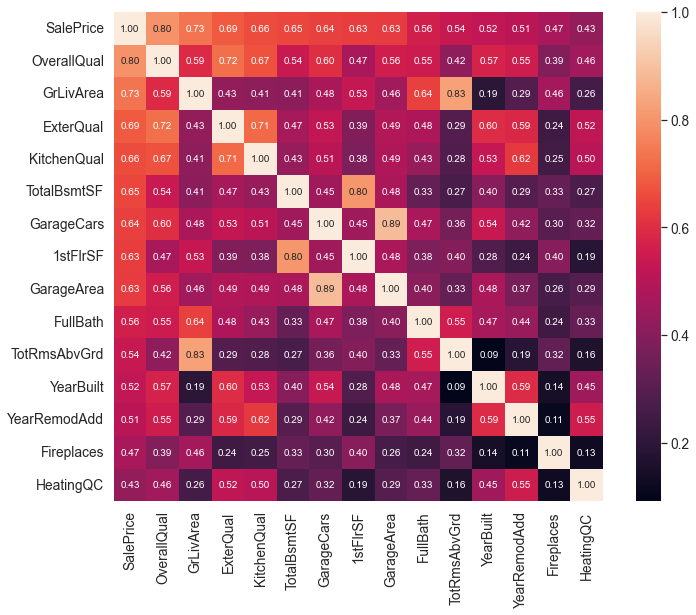

In [109]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_corr[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Fun plot from which we can see the trend of salesprice is not strictly qudratic along with the built year. There is a peak for the properties built in around 1932 and before 1900, while the trend is still steadily going upward.
In general, I would believe that the older houses would worth more and the same for newer ones. It would be arbitrary to conclude the houses built in around 1932 would worth more by just plotting this graph. However, it might be wise to add one specific dummy to capture this feature.

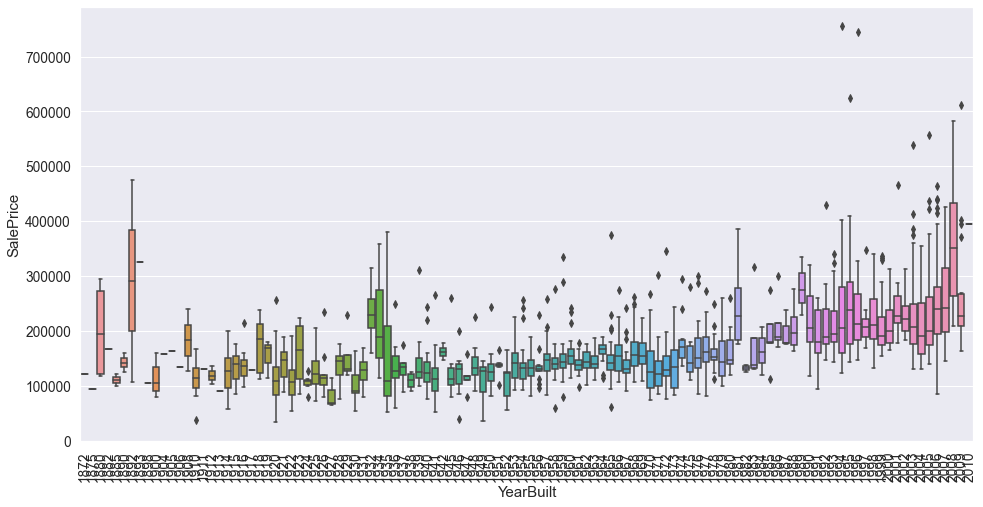

In [110]:
var = 'YearBuilt'
data = pd.concat([y_train, train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

In [111]:
def dum1930(aa):
    if 1931<=aa.YearBuilt<=1936:
        return 1
    else:
        return 0

In [112]:
full['Dum1930'] = full.apply(dum1930,axis=1)

# Feature engineering
## Target variable -- SalePrice

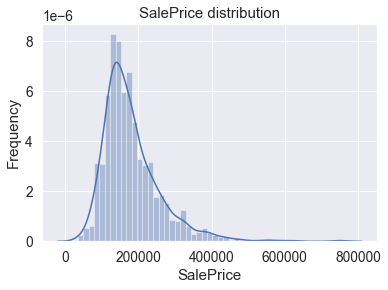

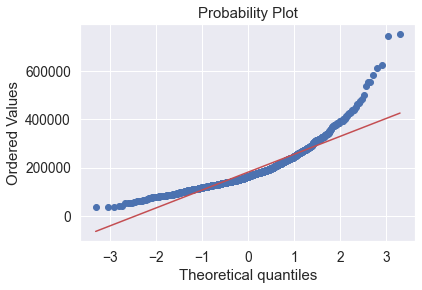

In [113]:
# SalePrice Distribution plot
sns.distplot(y_train)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Normal probability plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [114]:
#applying log(1+x) transformation
y_train = np.log1p(y_train)

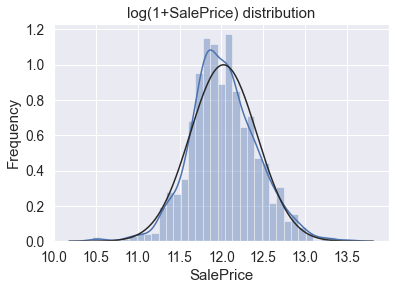

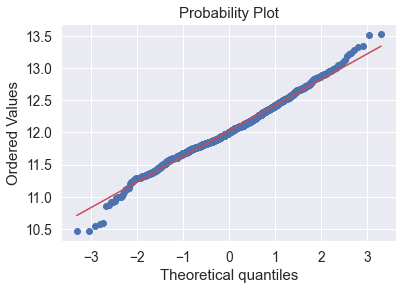

In [115]:
sns.distplot(y_train,fit=norm)
plt.ylabel('Frequency')
plt.title('log(1+SalePrice) distribution')

# Normal probability plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [116]:
# As we still assume linear relation between saleprice and house size in square feet, we do the same for 'GrLivArea'
# Similarly, for 'TotalBsmtSF', 'MiscVal', ... as well
full['GrLivArea'] = np.log1p(full['GrLivArea'])
full['TotalBsmtSF'] = np.log1p(full['TotalBsmtSF'])
full['MiscVal'] = np.log1p(full['MiscVal'])
full['BsmtFinSF1'] = np.log1p(full['BsmtFinSF1'])
full['BsmtFinSF2'] = np.log1p(full['BsmtFinSF2'])
full['BsmtUnfSF'] = np.log1p(full['BsmtUnfSF'])
full['1stFlrSF'] = np.log1p(full['1stFlrSF'])
full['2ndFlrSF'] = np.log1p(full['2ndFlrSF'])
full['LowQualFinSF'] = np.log1p(full['LowQualFinSF'])
full['GarageArea'] = np.log1p(full['GarageArea'])
full['WoodDeckSF'] = np.log1p(full['WoodDeckSF'])
full['OpenPorchSF'] = np.log1p(full['OpenPorchSF'])
full['EnclosedPorch'] = np.log1p(full['EnclosedPorch'])
full['3SsnPorch'] = np.log1p(full['3SsnPorch'])
full['ScreenPorch'] = np.log1p(full['ScreenPorch'])
full['PoolArea'] = np.log1p(full['PoolArea'])
full['MasVnrArea'] = np.log1p(full['MasVnrArea'])

## Modify time variables
As the housing sales happened within four years, in order to fully consider the specific time related features for each property and the possible qudratic impacts, here I modify the time features to specificly capture the time related impacts 

In [117]:
def remodgap(aa):
    if aa.YearBuilt == aa.YearRemodAdd:
        return 0
    else:
        val = aa.YrSold - aa.YearRemodAdd
        return val

In [118]:
full['BuiltGap'] = full.YrSold - full.YearBuilt
full['RemodGap'] = full.apply(remodgap,axis=1)

In [119]:
full['BuiltGap2'] = np.square(full.BuiltGap)
full['RemodGap2'] = np.square(full.RemodGap)

In [120]:
full.drop('YearBuilt',axis=1,inplace=True)
full.drop('YearRemodAdd',axis=1,inplace=True)

In [121]:
# for 'GarageYrBlt', as it is modified, and there are already 'GarageQual', 'GarageCond' measuring it, I drop it
full.drop('GarageYrBlt',axis=1,inplace=True)

In [122]:
full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Dum1930,BuiltGap,RemodGap,BuiltGap2,RemodGap2
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2.0,6.308098,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,None,None,None,0.0,2,2008,WD,Normal,0,5,0,25,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,6.133398,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.0,5,2007,WD,Normal,0,31,0,961,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,6.411818,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,None,None,None,0.0,9,2008,WD,Normal,0,7,6,49,36
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,6.466145,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,None,None,None,0.0,2,2006,WD,Abnorml,0,91,36,8281,1296
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,6.729824,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,None,None,None,0.0,12,2008,WD,Normal,0,8,0,64,0


## Change the types of data to reflect the features

In [ ]:
full['MSSubClass'] = full['MSSubClass'].astype(str)
full['OverallQual'] = full['OverallQual'].astype(str)
full['OverallCond'] = full['OverallCond'].astype(str)
full['Dum1930'] = full['Dum1930'].astype(str)
full['YrSold'] = full['YrSold'].astype(str)
full['MoSold'] = full['MoSold'].astype(str)
full['BsmtFullBath'] = full['BsmtFullBath'].astype(str)
full['BsmtHalfBath'] =full['BsmtHalfBath'].astype(str)
full['FullBath'] =full['FullBath'].astype(str)
full['HalfBath'] =full['HalfBath'].astype(str)
full['BedroomAbvGr'] =full['BedroomAbvGr'].astype(str)
full['KitchenAbvGr'] =full['KitchenAbvGr'].astype(str)
full['TotRmsAbvGrd'] =full['TotRmsAbvGrd'].astype(str)
full['GarageCars'] =full['GarageCars'].astype(str)

# Basic Modelling & Evaluation

The main task here is to reduce the number of features in the model to avoid overfit. There are two methods I want to apply here.
* According to data description, reduce features manually.
* Reduce features by applying Principle Component Analysis (PCA).
Naturally, there would by one extra method doing nothing as the counterpart.

For each model, the regression methods are **LASSO, Kernel Ridge Regression, Random Forest, Gradient Boosting Regression, XGBoost, LightGBM**.

Besides, I will try to use graphs to measure the bias and variance between models.

In [ ]:
full.drop('Id',axis=1,inplace=True)
full.drop('LotFrontage',axis=1,inplace=True) # As I didnt find good ways to estimate it

In [ ]:
full_mnu = full
full_pca = full
full_cp = full

## Manually reduction

* As discussed above, 'OverallQual' can roughly represent all other Condition/Quality features, so I drop all the rest
* AS the most of values (93.21%) for 'Alley' are 'None', so I drop it
* For Condition(s), Exterior(s),BsmtFinType(s), I drop the second ones.
* For BsmtFinSF(s), as there is sum number for them, so I drop both. 
* For 2ndFlrSF, as it equals to GrLivArea mins 1stFlrSF, so I drop it.
* For GarageArea, as it can be substituted by GarageCars, so I drop it.

In [ ]:
for col in ('ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
            'GarageCond','Alley','Condition2','Exterior2nd','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
           '2ndFlrSF','GarageArea'):
    full_mnu.drop(col,axis=1,inplace=True)

In [ ]:
full_mnu_dum = pd.get_dummies(full_mnu)

In [ ]:
full_mnu_dum.shape

## PCA reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
full_pca_dum = pd.get_dummies(full_pca)

In [ ]:
pca = PCA(n_components='mle')
pca.fit(full_pca_dum)
full_pca_dum = pca.transform(full_pca_dum)

In [ ]:
full_pca_dum.shape

In [ ]:
y_std = np.std(y_train)
y_mean = np.mean(y_train)

In [ ]:
y_pca_scal = (y_train-y_mean)/y_std

## Modelling for comparing cross-validation error across feature reduction methods

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

In [ ]:
# define the error measurement
def rmse(y,y_pred):
    T = len(y_pred)
    y_act = y[0:T]
    val = np.sqrt(np.sum(np.square(y_act - y_pred))/T)
    return val

In [ ]:
# Use Ridge regression to plot cross validation errors
def cv_plot(X,y):
    # Use train data set only
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=15)
    length = min(len(y_train),len(y_test))
    clf = KernelRidge(alpha=0.75)
    err_cv = []
    err_train = []
    x = range(100,length,10)
    for i in range(100,length,10):
        clf.fit(X_train[0:i], y[0:i])
        y_pred_train = clf.predict(X_train[0:i])
        err_train_ = rmse(y_train[0:i],y_pred_train)
        y_pred_cv = clf.predict(X_test[0:i])
        err_cv_ = rmse(y_test[0:i],y_pred_cv)
        err_train.append(err_train_)
        err_cv.append(err_cv_)
    
    plt.plot(x, err_cv, label='cost of cv')
    plt.plot(x, err_train,label='cost of train')
    plt.legend()
    
    plt.xlabel('Sample Size') 
    plt.ylabel("rmse error")

In [ ]:
X_mnu_dum = full_mnu_dum[:1458]
y_mnu = y_train

In [ ]:
cv_plot(X_mnu_dum,y_mnu)
plt.title('Manual feature reduction')

In [ ]:
X_pca_dum = full_pca_dum[:1458]
y_pca = y_pca_scal
cv_plot(X_pca_dum,y_pca)
plt.title('PCA feature reduction')

In [ ]:
full_cp_dum = pd.get_dummies(full_cp)
X_cp_dum = full_cp_dum[:1458]
y_cp = y_train
cv_plot(X_cp_dum,y_cp)
plt.title('No feature reduction')

Conclusion:

* The PCA result is kind of disappointing as it gives the worest cross valiadation results compared with the other two.


* The manual feature reduction is proved less useful as it gives the very similar compared with the one with no feature reduction. The reason for this might be conclued as the ridger or kernel ridge regression concludes the regularization feature alpha, which would the converge the results of two methods.

## Modelling for Housing Price Prediction

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# import xgboost as xgb
# import lightgbm as lgb
# I didnt successfully install these two due to some system errors
# says my OS is 64-bit and my python is 32-bit
# It may take some time for me to fix this problem

In [ ]:
models=[Lasso(),KernelRidge(),RandomForestRegressor(),GradientBoostingRegressor()]

In [ ]:
X = full_cp_dum[:1458]
y = y_train
test_X = full_cp_dum[1458:]

In [ ]:
names = ['Lasso','Krnlridg','RFs','GBR']
for name, model in zip(names,models):
    score=-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

**Comment:** \
\
Lasso may suffer from ourlier or unscaled data => I'm hesitate to do so since I am not sure how to transform the predicted house price back. \
\
It seems the Kernel Ridge Regression and Gradient Boosting Regression give the most desirable results.

# Hyperparameters tuning

Here I simply choose Kernel Ridge Regression and Gradient Boosting Regression as the models for predictions

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'alpha':[0.5,0.7,0.9],'kernel':['linear','polynomial']}
grid_search=GridSearchCV(KernelRidge(),param_grid,scoring="neg_mean_squared_error",cv=5)

grid_search.fit(X,y)

grid_search.best_params_,grid_search.best_score_


In [ ]:
param_grid={'n_estimators':[30,50,80,120,200],'learning_rate':[0.1,0.2,0.3],'max_depth':[2,3,4]}
grid_search=GridSearchCV(GradientBoostingRegressor(),param_grid,scoring="neg_mean_squared_error",cv=5)

grid_search.fit(X,y)

grid_search.best_params_,grid_search.best_score_


# Ensemble Methods

simply take the average of two predicting results

In [ ]:
clf = KernelRidge(alpha=0.5)
clf.fit(X, y)
y_KR = clf.predict(test_X)

In [ ]:
clf = GradientBoostingRegressor(learning_rate=0.1,n_estimators=200,max_depth=4)
clf.fit(X, y)
y_GBR = clf.predict(test_X)

In [ ]:
y = (y_KR + y_GBR)/2

In [ ]:
pred = np.exp(y)-1

In [ ]:
submission=pd.DataFrame({'Id':test.Id,'SalePrice':pred})

In [ ]:
submission.to_csv('submission.csv',index=False,encoding='utf-8')